In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mouse_df = pd.read_csv('data/Mouse_metadata.csv')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [9]:
mouse_df.shape

(249, 5)

In [7]:
results_df = pd.read_csv('data/Study_results.csv')
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
results_df.shape

(1893, 4)

In [8]:
merged_df = mouse_df.merge(results_df, on=['Mouse ID', 'Mouse ID'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
merged_df.shape

(1893, 8)

In [17]:
summary_df = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'sem'])

In [23]:
columns = [('Tumor Volume', 'mean'), ('Tumor Volume', 'median'), ('Tumor Volume', 'std'), ('Tumor Volume', 'sem')]
summary_df.columns = pd.MultiIndex.from_tuples(columns, sortorder=1)

In [24]:
summary_df

Tumor Volume                               
                     mean     median       std       sem
Drug Regimen                                            
Capomulin       40.675741  41.557809  4.994774  0.329346
Ceftamin        52.591172  51.776157  6.268188  0.469821
Infubinol       52.884795  51.820584  6.567243  0.492236
Ketapril        55.235638  53.698743  8.279709  0.603860
Naftisol        54.331565  52.509285  8.134708  0.596466
Placebo         54.033581  52.288934  7.821003  0.581331
Propriva        52.322552  50.854632  6.507770  0.512884
Ramicane        40.216745  40.673236  4.846308  0.320955
Stelasyn        54.233149  52.431737  7.710419  0.573111
Zoniferol       53.236507  51.818479  6.966589  0.516398

In [27]:
treatment_counts = merged_df.groupby('Drug Regimen')['Drug Regimen'].count()
treatment_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

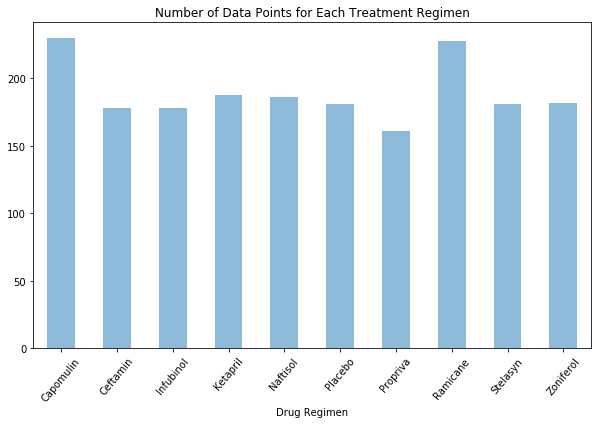

In [67]:
treatment_counts.plot(kind='bar', rot=50, title='Number of Data Points for Each Treatment Regimen', alpha=0.5, figsize=(10,6), width=0.5)

In [40]:
treatment_counts.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

Text(0.5, 0, 'Drug Regimen')

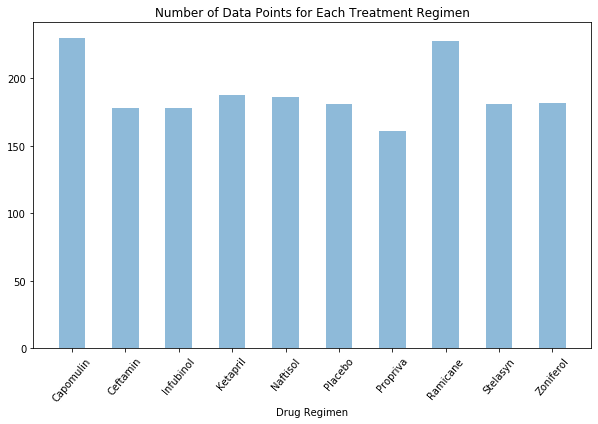

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(treatment_counts.index, treatment_counts, alpha=0.5, width=0.5)
ax.set_title('Number of Data Points for Each Treatment Regimen')
plt.xticks(rotation=50)
ax.set_xlabel('Drug Regimen')